<a href="https://www.kaggle.com/code/muhammadasifwazir/build-simple-nn-for-cifar-10-dataset?scriptVersionId=196986245" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Problems we Face**

1. **Overfiting Occurs:** Because we have High Training Accuracy and Lower Validation Accuracy
- Epoch 50/50: 1563/1563 - 3s - 2ms/step - accuracy: 0.8718 - loss: 0.3880 - val_accuracy: 0.5502 - val_loss: 2.6132
2. **Underfiting Occure:** Because we have Low Training Accuracy and High Validation Accuracy
- Epoch 5/50: 1563/1563 - 3s - 2ms/step - accuracy: 0.0978 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
## **Steps to Address Overfitting**

1. Data agumentation
2. add Dropout layers
3. Early Stoping
4. introduce learning rate

# **IMPORT LIBARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn as sk

# **DATASET LOADING**

In [3]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


## **Avoid Overfiting Technique: Data Augumentation**

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator to your training data
datagen.fit(x_train)

# **EXPLORING DATASET**

In [5]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


# **VISUALIZATION**

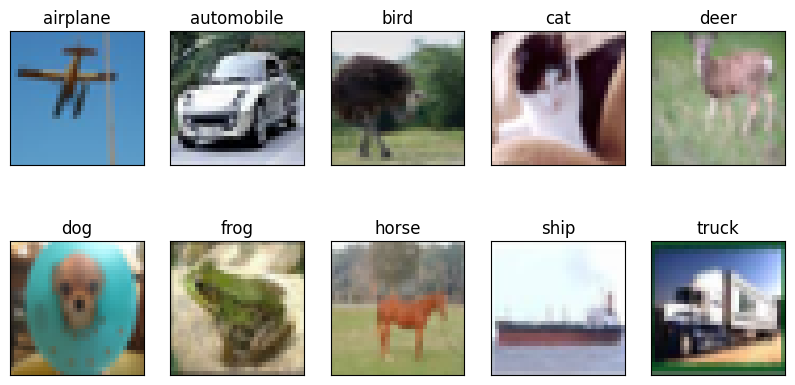

In [6]:
# plotting some random 10 images
num_classes = 10

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


fig = plt.figure(figsize=(10,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

# **SPLITING DATASET**
- **TRAIN AND TEST DATA SPLITING**

# **Pre-Processing**
- **OneHot encoding**

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# **Building The Neural Network**

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#from keras.layers import Dense

In [9]:
from tensorflow.keras.layers import Dropout

# Create the model with Dropout
model = Sequential()


# Add a Conv2D layer (for 32x32x3 images)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# Add a MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten the output to feed into Dense layers
model.add(Flatten())


# 8 Neurons, expects input of 4 features. 
# Play around with the number of neurons!!
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer
# Add another Densely Connected layer (every neuron connected to every neuron in the next layer)
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer
# Last layer simple sigmoid function to output 0 or 1 (our label)
model.add(Dense(10, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Compile the model**

In [10]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

## **Avoid Overfitting Technique: Early Stoping**

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

## **MODEL TRAINING**

In [12]:
model.fit(x_train, y_train,
          epochs=50, batch_size=32, verbose=2, 
          validation_data=(x_test, y_test), 
          callbacks=[early_stopping])

Epoch 1/50


I0000 00:00:1726562405.834185      71 service.cc:145] XLA service 0x7ccf3c005080 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726562405.834264      71 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726562405.834271      71 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1726562411.073354      71 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 - 16s - 10ms/step - accuracy: 0.0988 - loss: 2.6331 - val_accuracy: 0.1001 - val_loss: 2.3026
Epoch 2/50
1563/1563 - 4s - 2ms/step - accuracy: 0.0988 - loss: 2.3032 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/50
1563/1563 - 4s - 2ms/step - accuracy: 0.0975 - loss: 2.3042 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/50
1563/1563 - 4s - 2ms/step - accuracy: 0.0995 - loss: 2.3031 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/50
1563/1563 - 4s - 2ms/step - accuracy: 0.0965 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/50
1563/1563 - 4s - 2ms/step - accuracy: 0.0973 - loss: 2.3029 - val_accuracy: 0.1001 - val_loss: 2.3026
Epoch 7/50
1563/1563 - 4s - 2ms/step - accuracy: 0.0971 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/50
1563/1563 - 4s - 2ms/step - accuracy: 0.0983 - loss: 2.3033 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 9/50
1563/1563 - 4s - 2ms/step - accuracy: 0.0978 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss:

# **Evaluating Model**

# **Saving and Loading Models**